# Sentiment Analysis 

## Setting up imports and twitter API

In [1]:
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
access_token = "1351055529334988804-t8ZwkYF0iEaG00ul9FaffHlJmnJUlR"
access_token_secret = "JzrPD0tgRa6Q3G8CdmqkXHXW8N9Vjk2pxowUUbhUnOSr7"
consumer_key = "FEn09Sr124drRxWxSE3Mioql1"
consumer_secret = "pXMtQyyaUgJkxfNJWg7FgQT8z6IxrF1bMsh1wFZ5E3cpojUhcX"


In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)


## Scraping tweets using tweepy

In [6]:
topic = "farmers protest (#farmersprotest OR #FarmersProtest OR #FarmersBill OR #FarmersBill2020 OR #FarmLaws OR #FarmersProtests OR #FarmLaws2020) lang:en"
query = tw.Cursor(api.search, q = topic).items(3000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]

print(tweets)

[{'Tweet': 'Farmers protest in India\nKisan tractor rally reached Lal Qilla\nChanting against Modi\n#FarmersProtest… https://t.co/cioksK30Nf', 'Timestamp': datetime.datetime(2021, 1, 26, 9, 13, 35)}, {'Tweet': 'RT @Tractor2twitr: Hundreds of farmers have entered Red Fort in a protest against #FarmLaws2020\n\nSecurity Personnel is trying to remove the…', 'Timestamp': datetime.datetime(2021, 1, 26, 9, 13, 35)}, {'Tweet': 'RT @timesofindia: A protestor hoists a flag from the ramparts of the Red Fort in Delhi\n\n#FarmLaws #RepublicDay \n\n(Video: ANI) \n\nFarmers pro…', 'Timestamp': datetime.datetime(2021, 1, 26, 9, 13, 34)}, {'Tweet': "RT @stay_awaybitch: Apparently blind people can't see police beating farmers ruthlessly but they do know the need of dropping hearts for po…", 'Timestamp': datetime.datetime(2021, 1, 26, 9, 13, 10)}, {'Tweet': "RT @RavinderKapur2: @RahulGandhi Let's have a non violence farmers tractors rally .\nViolence is not acceptable at any level from anyone\nLet…", 'Ti

In [7]:
df = pd.DataFrame.from_dict(tweets)
df.tail()

,Tweet,Timestamp
2995,It’s #RepublicDay2021 in India and farmers are...,2021-01-26 01:47:34
2996,RT @RaviSinghKA: Dear @DelhiPolice \n\nOur far...,2021-01-26 01:47:29
2997,RT @Umm_e_Meeran: Today across the Maharashtra...,2021-01-26 01:47:03
2998,RT @RaviSinghKA: Dear @DelhiPolice \n\nOur far...,2021-01-26 01:46:08
2999,RT @Kurmanath: #Telangana High Court directs p...,2021-01-26 01:45:39


## Cleaning the tweets

In [8]:
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['rt', 'th']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sundarraghavanl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sundarraghavanl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
import re

def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet.lower()
    processed_tweet = " ".join(re.sub('@[^\s]+', '', processed_tweet).split()) #removing usernames -> recognising an @ followed by characters that aren't \s ie they arent white spaces
    processed_tweet = " ".join(re.sub(r'#\w+ ?', '', processed_tweet).split()) #removing hashtags 
    processed_tweet = " ".join(re.sub(r'http\S+', '', processed_tweet).split()) #removing URLs
    processed_tweet = " ".join(re.sub('[^-9A-Za-z ]', '', processed_tweet).split()) #removing punctuation
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words) #removing standard nltk stopwords
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords) #removing custom stopwords
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split()) 
    processed_tweet = " ".join(re.sub('\s+', ' ', processed_tweet).split()) #removing redundant white spaces
    return(processed_tweet)
    

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Processed Tweet
0,Farmers protest in India\nKisan tractor rally ...,2021-01-26 09:13:35,farmer protest india kisan tractor rally reach...
1,RT @Tractor2twitr: Hundreds of farmers have en...,2021-01-26 09:13:35,hundred farmer entered red fort protest securi...
2,RT @timesofindia: A protestor hoists a flag fr...,2021-01-26 09:13:34,protestor hoist flag rampart red fort delhi vi...
3,RT @stay_awaybitch: Apparently blind people ca...,2021-01-26 09:13:10,apparently blind people cant see police beatin...
4,RT @RavinderKapur2: @RahulGandhi Let's have a ...,2021-01-26 09:13:06,let non violence farmer tractor rally violence...


## Finding sentiment and assigning labels

In [57]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [60]:
df.head()

,Tweet,Timestamp,Processed Tweet,polarity,subjectivity
0,Farmers protest in India\nKisan tractor rally ...,2021-01-26 09:13:35,farmer protest india kisan tractor rally reach...,0.00,0.000000
1,RT @Tractor2twitr: Hundreds of farmers have en...,2021-01-26 09:13:35,hundred farmer entered red fort protest securi...,0.00,0.000000
2,RT @timesofindia: A protestor hoists a flag fr...,2021-01-26 09:13:34,protestor hoist flag rampart red fort delhi vi...,0.00,0.000000
3,RT @stay_awaybitch: Apparently blind people ca...,2021-01-26 09:13:10,apparently blind people cant see police beatin...,-0.75,0.833333
4,RT @RavinderKapur2: @RahulGandhi Let's have a ...,2021-01-26 09:13:06,let non violence farmer tractor rally violence...,0.00,0.000000


In [61]:
labels = np.empty(len(df))

for i in range(0,len(df)):
    if df.polarity[i] > 0:
        labels[i] = 1 
    elif df.polarity[i] < 0:
        labels[i] = -1
    elif df.polarity[i] == 0:
        labels[i] = 0

In [62]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [63]:
df['label'] = labels
df.head()

,Tweet,Timestamp,Processed Tweet,polarity,subjectivity,label
0,Farmers protest in India\nKisan tractor rally ...,2021-01-26 09:13:35,farmer protest india kisan tractor rally reach...,0.00,0.000000,0.0
1,RT @Tractor2twitr: Hundreds of farmers have en...,2021-01-26 09:13:35,hundred farmer entered red fort protest securi...,0.00,0.000000,0.0
2,RT @timesofindia: A protestor hoists a flag fr...,2021-01-26 09:13:34,protestor hoist flag rampart red fort delhi vi...,0.00,0.000000,0.0
3,RT @stay_awaybitch: Apparently blind people ca...,2021-01-26 09:13:10,apparently blind people cant see police beatin...,-0.75,0.833333,-1.0
4,RT @RavinderKapur2: @RahulGandhi Let's have a ...,2021-01-26 09:13:06,let non violence farmer tractor rally violence...,0.00,0.000000,0.0


## EDA

In [52]:
df.describe() 

,polarity,subjectivity,label
count,3000.000000,3000.000000,3000.000000
mean,0.091093,0.386032,0.443667
std,0.166751,0.275567,0.586181
min,-0.800000,0.000000,-1.000000
25%,0.000000,0.100000,0.000000
50%,0.000000,0.400000,0.000000
75%,0.250000,0.500000,1.000000
max,1.000000,1.000000,1.000000


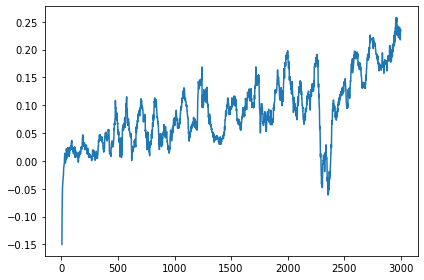

In [66]:
plt.plot(df.polarity.rolling(40, min_periods=5).mean())
plt.tight_layout()
plt.show()

/Users/sundarraghavanl/opt/anaconda2/envs/new_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


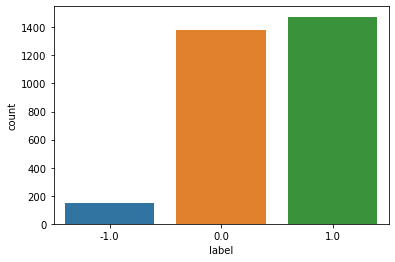

In [67]:
import seaborn as sns
sns.countplot(df['label'])
plt.show()

## Building a classifier 

In [20]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

### Naive Bayes classifier

In [21]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [22]:
msg_train, msg_test, label_train, label_test = train_test_split(df['Processed Tweet'], df['label'], test_size = 0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

        -1.0       0.39      1.00      0.56        12
         0.0       0.98      0.92      0.95       289
         1.0       0.95      0.94      0.95       299

    accuracy                           0.94       600
   macro avg       0.77      0.96      0.82       600
weighted avg       0.95      0.94      0.94       600

[[ 12   0   0]
 [  8 267  14]
 [ 11   6 282]]
0.935


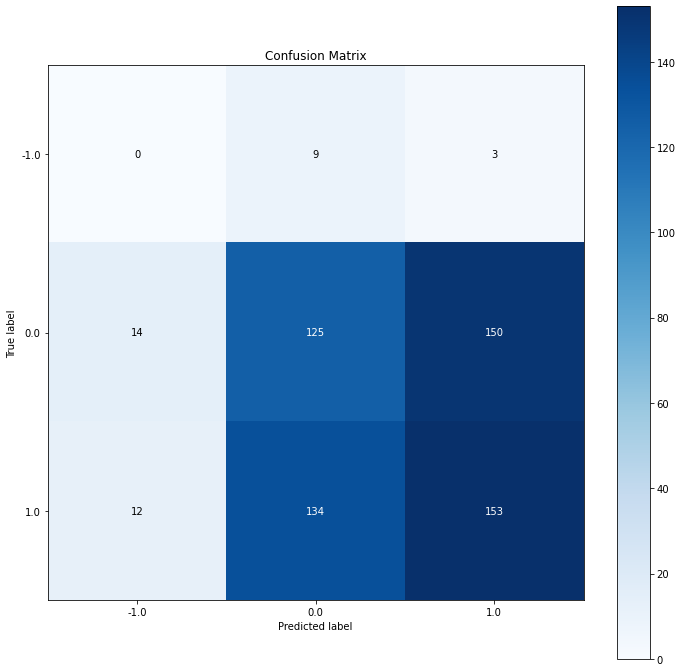

In [68]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(predictions, label_test, figsize = (12,12))
plt.show()

In [24]:
print(accuracy_score(predictions,label_test))

0.935


### Logistic regression classifier

In [26]:
from sklearn.linear_model import LogisticRegression

pipeline_logreg = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
        ])

In [27]:
msg_train, msg_test, label_train, label_test = train_test_split(df['Processed Tweet'], df['label'], test_size = 0.2)
pipeline_logreg.fit(msg_train,label_train)
log_predictions = pipeline_logreg.predict(msg_test)
print(classification_report(log_predictions,label_test))
print(confusion_matrix(log_predictions,label_test))
print(accuracy_score(log_predictions,label_test))

              precision    recall  f1-score   support

        -1.0       0.42      0.92      0.58        12
         0.0       0.98      0.92      0.95       285
         1.0       0.96      0.97      0.96       303

    accuracy                           0.94       600
   macro avg       0.79      0.94      0.83       600
weighted avg       0.96      0.94      0.95       600

[[ 11   1   0]
 [  9 263  13]
 [  6   4 293]]
0.945


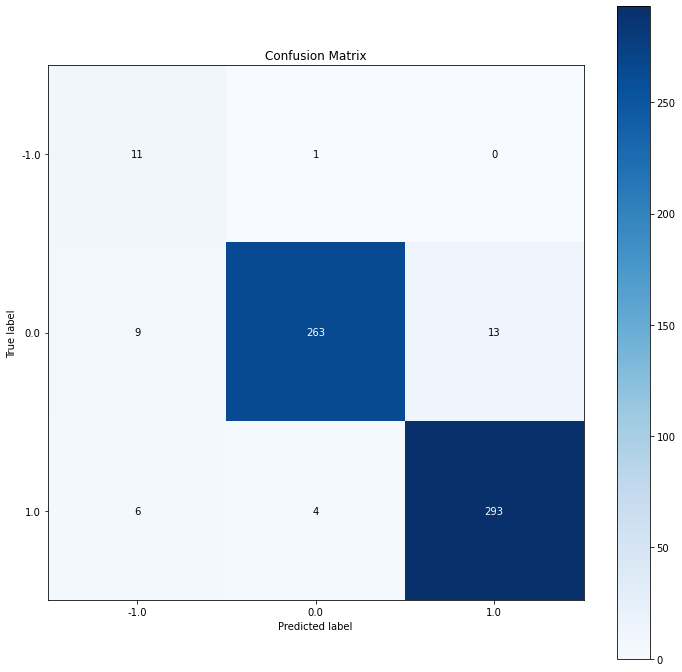

In [69]:
skplt.metrics.plot_confusion_matrix(log_predictions, label_test, figsize = (12,12))
plt.show()

Logistic regression works slightly better than Naive Bayes

## Most used words

### Overall

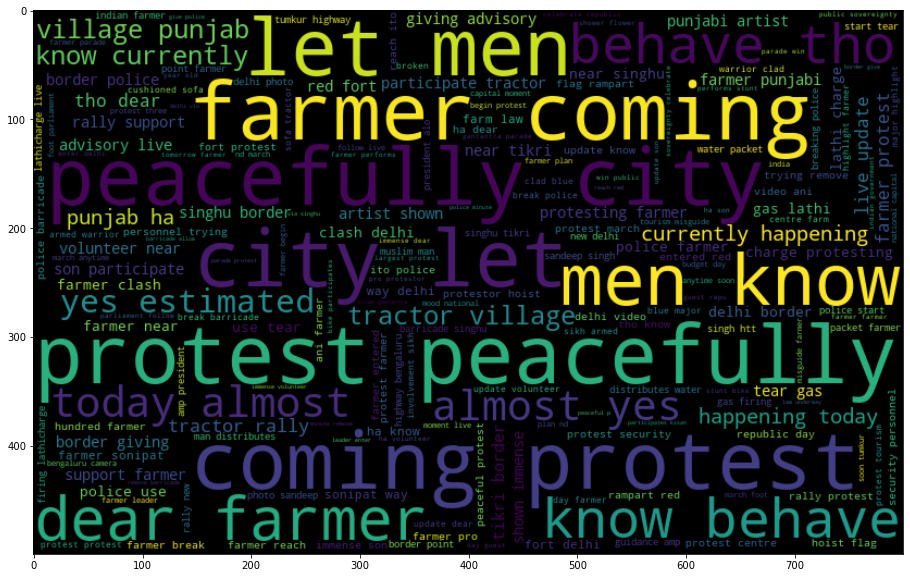

In [29]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['Processed Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### Positive

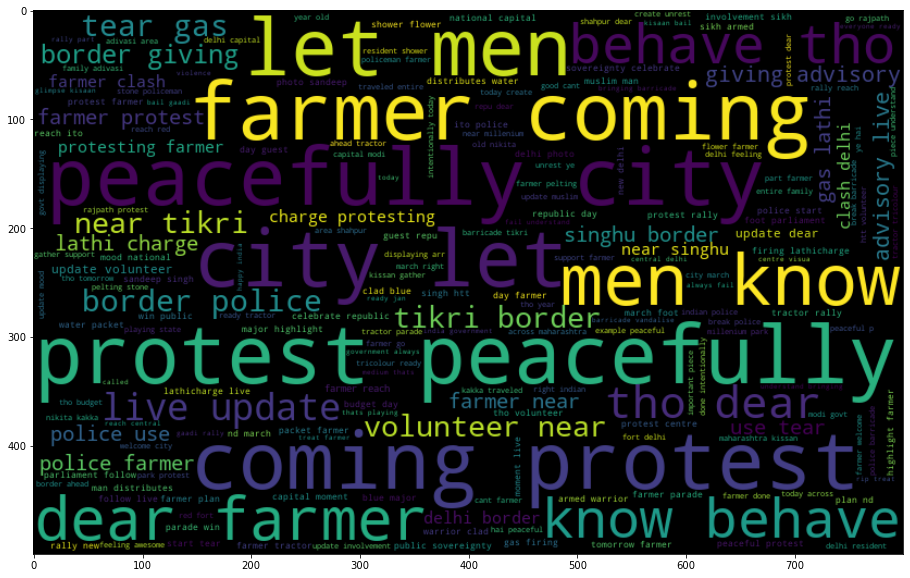

In [30]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df[df['label'] == 1]['Processed Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### Negative

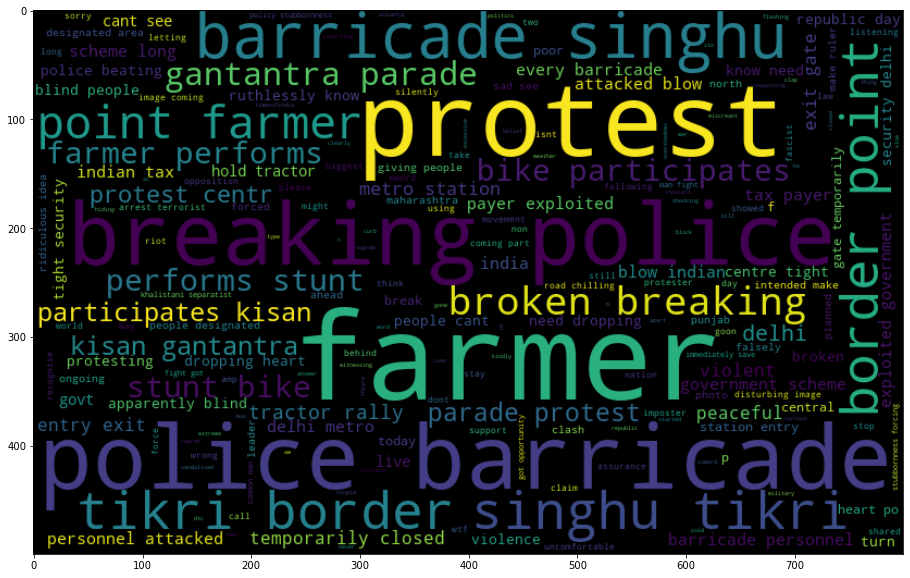

In [32]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df[df['label'] == -1]['Processed Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
img = plt.imshow(wordcloud, interpolation="bilinear")
plt.show()